# Exploratory Data Analysis for Final Project

In this assignment, your task is to put your new skils to use in the form of an open-ended, exploratory data analysis. In particular, I'm looking for you to demonstrate your ability to use the programmatic tools we've been learning to access data, manipulate it, and visualize some findings while working towards the ultimate goal of developing a final project proposal. Please include the following in your assignment:

  1. A brief summary of the topic (a few sentences)
  2. Access 2 or more datasets, at least one of them using an API (if you are not using any data from an API as part of your project yet, don’t worry about it, and just do this to get some exercise using APIs. You might use it later).
  3. Demonstrate the use of Pandas operations to filter out missing data and/or outliers.
  4. Demonstrate your capacity to use some of the "group-by" operations to produce pivot tables or statistical summaries of your data.
  5. Use Matplotlib or Seaborn to produce 2-3 data visualizations of your data to both explore the data and highlight any notable patterns.
  6. Include a short written analysis of your interpretation of the data.
  7. In a few paragraphs, describe the research question you intend to investigate in your final project, and the plan for the data analysis you intend to perform.

Note that this exercise is intended to help you formulate your project topic. But it is not a binding contract. Your project will most likely evolve over the rest of the semester. So use this as an opportunity to be creative, throw some ideas against the wall and see what sticks. I will release the final project guidelines shortly. In the meantime, dig in!

And as always, please submit this assignment both as a PR on GitHub along with the URL of your PR on bCourses.

# Part 1: Brief summary

Parks are one of the few (mostly) "free-to-be" third places in our cities and towns. They are integral to health and well-being by providing space for physical activity and being in green spaces has been shown to be a large factor in reducing stress. They also provide a space for community, whether folks are there to hang out with friends and family or to be alone but amongst neighbors.

When someone wants to explore a new park, searching online can be a helpful tool for this. While apps like Strava and AllTrails have a plethora of data on parks with trails, their users tend to be more fitness-minded and do not necessarily capture leisurely uses of parks. Considering this, Yelp was chosen as a source.

# Part 2: Access datasets

In [1]:
import pandas as pd
import json
import requests 
import pprint    
pp = pprint.PrettyPrinter()

In [238]:
#2 Accessing datasets: API City of Oakland park quality indicator at the council district level

endpoint_url = "https://data.oaklandca.gov/resource/sbr3-iqtb.json"
response = requests.get(endpoint_url)
results = response.text
print(type(results))
print(results[:500])

<class 'str'>
[{"council_district":"CD 1","average_overall_park_quality":"2.9","year":"2016"}
,{"council_district":"CD 2","average_overall_park_quality":"2.4","year":"2016"}
,{"council_district":"CD 3","average_overall_park_quality":"2.4","year":"2016"}
,{"council_district":"CD 4","average_overall_park_quality":"2.7","year":"2016"}
,{"council_district":"CD 5","average_overall_park_quality":"2.5","year":"2016"}
,{"council_district":"CD 6","average_overall_park_quality":"2.6","year":"2016"}
,{"council_district"


In [239]:
pd.read_json(endpoint_url).head()

,council_district,average_overall_park_quality,year
0,CD 1,2.9,2016
1,CD 2,2.4,2016
2,CD 3,2.4,2016
3,CD 4,2.7,2016
4,CD 5,2.5,2016


In [39]:
#Accessing datasets: PARKS from Oakland city data to check against the parks listed in Yelp reviews

endpoint_url_parks = "https://data.oaklandca.gov/resource/qyh9-i9dw.json"
response_parks = requests.get(endpoint_url_parks)
results_parks = response_parks.text
print(type(results_parks))
print(results_parks[:500])

<class 'str'>
[{"parks_and_recreation_facilities":"Tassafaronga Park","facility_type":"Community Gardens","phone_number":"(510) 238-2208","location_1":{"latitude":"37.75170670411359","longitude":"-122.184847139135","human_address":"{\"address\": \"83rd and E Streets\", \"city\": \"Oakland\", \"state\": \"CA\", \"zip\": \"\"}"},":@computed_region_w23w_jfhw":"1493"}
,{"parks_and_recreation_facilities":"Peralta Hacienda Park","facility_type":"Park","phone_number":"(510) 238-PARK","url":{"url":"http://www2.oaklan


In [57]:
pd.read_json(endpoint_url_parks).head()

,parks_and_recreation_facilities,facility_type,phone_number,location_1,:@computed_region_w23w_jfhw,url
0,Tassafaronga Park,Community Gardens,(510) 238-2208,"{'latitude': '37.75170670411359', 'longitude': '-122.184847139135', 'human_address': '{""address"": ""83rd and E Streets"", ""city"": ""Oakland"", ""state"": ""CA"", ""zip"": """"}'}",1493,NaN
1,Peralta Hacienda Park,Park,(510) 238-PARK,"{'latitude': '37.78752670054064', 'longitude': '-122.21682703049692', 'human_address': '{""address"": ""2500 34th Avenue"", ""city"": ""Oakland"", ""state"": ""CA"", ""zip"": """"}'}",1188,{'url': 'http://www2.oaklandnet.com/Government/o/opr/s/Parks/index.htm'}
2,"Arroyo Viejo, Lucky A's",Tennis Court,(510) 444-5663,"{'latitude': '37.76125655356008', 'longitude': '-122.17386978503461', 'human_address': '{""address"": ""7921 Olive Street"", ""city"": ""Oakland"", ""state"": ""CA"", ""zip"": """"}'}",1493,{'url': 'http://www2.oaklandnet.com/Government/o/opr/s/Tennis/index.htm'}
3,San Antonio Park,Park,(510) 238-PARK,"{'latitude': '37.79100751139034', 'longitude': '-122.23992575719154', 'human_address': '{""address"": ""1701 E 19th Street"", ""city"": ""Oakland"", ""state"": ""CA"", ""zip"": """"}'}",1483,{'url': 'http://www2.oaklandnet.com/Government/o/opr/s/Parks/index.htm'}
4,Verdese Carter Park,Park,(510) 238-PARK,"{'latitude': '37.748541090570484', 'longitude': '-122.16335334263471', 'human_address': '{""address"": ""9600 Sunnyside Street"", ""city"": ""Oakland"", ""state"": ""CA"", ""zip"": """"}'}",1481,{'url': 'http://www2.oaklandnet.com/Government/o/opr/s/Parks/index.htm'}


In [36]:
#Accessing datasets: TREES from City of Oakland in case they're in handy later

endpoint_url_trees = "https://data.oaklandca.gov/resource/4jcx-enxf.json"
response_trees = requests.get(endpoint_url_trees)
results_trees = response_trees.text
print(type(results_trees))
print(results_trees[:500])

In [20]:
#Accessing datasets: YELP Oakland park reviews

import requests

# Replace 'YOUR_API_KEY' with your actual Yelp API key
api_key = 'eXQ08iO7JgnrHZVxn66FvyAmeC3HxEsV0X2qXjNdjcPYBhgtxh2nQ5DXdC-XOjjtl4eB_Oq-MBdNCQ-77kx_px1ttwANJOVmGr2bJIe_EEnGVpOFoUmGyvwTyRXpZXYx'
headers = {
    'Authorization': f'Bearer {api_key}',
}

endpoint_url_yelp = "https://api.yelp.com/v3/businesses/search?location=Oakland&categories=parks"
response_yelp = requests.get(endpoint_url_yelp, headers=headers)

if response_yelp.status_code == 200:
    data = response_yelp.json()
    df = pd.json_normalize(response_yelp.json(), 'businesses')
    print(df.head())
else:
    print("Error:", response_yelp.status_code)


                       id                                             alias  \
0  9vmPjuRuNf2jYSdS0szEuw                     redwood-regional-park-oakland   
1  bt3mS_fhHWj4K-RJa1nXtQ                              lake-merritt-oakland   
2  3kn4EwG8TlpY0aw2kBfxDA              morcom-municipal-rose-garden-oakland   
3  uvgHd2HlGHcNBsnqZT0Klg                       joaquin-miller-park-oakland   
4  uWsuv9oyWZYFFPhNYmXXGA  robert-sibley-volcanic-regional-preserve-oakland   

                                       name  \
0                     Redwood Regional Park   
1                              Lake Merritt   
2              Morcom Municipal Rose Garden   
3                       Joaquin Miller Park   
4  Robert Sibley Volcanic Regional Preserve   

                                           image_url  is_closed  \
0  https://s3-media2.fl.yelpcdn.com/bphoto/OTaC3K...      False   
1  https://s3-media2.fl.yelpcdn.com/bphoto/nGMGOM...      False   
2  https://s3-media2.fl.yelpcdn.com/bphot

In [51]:
if response_yelp.status_code == 200:
    data = response_yelp.json()
    # Extracting relevant columns
    businesses = data.get('businesses', [])
    records = [
        {
            'name': business['name'],
            'review_count': business['review_count'],
            'categories': ', '.join([category['title'] for category in business['categories']]),
            'rating': business['rating'],
            'latitude': business['coordinates']['latitude'],
            'longitude': business['coordinates']['longitude'],
            'address': business['location']['address1'],
            'city':business['location']['city'],
            'zip_code': business['location']['zip_code']
        }
        for business in businesses
    ]
    df = pd.DataFrame.from_records(records)
    print(df.head())
else:
    print("Error:", response_yelp.status_code)

                                       name  review_count         categories  \
0                     Redwood Regional Park           572              Parks   
1                              Lake Merritt           629       Parks, Lakes   
2              Morcom Municipal Rose Garden           143              Parks   
3                       Joaquin Miller Park           303      Parks, Hiking   
4  Robert Sibley Volcanic Regional Preserve           160  Hiking, Dog Parks   

   rating   latitude   longitude                 address     city zip_code  
0     4.7  37.811524 -122.162963         7867 Redwood Rd  Oakland    94619  
1     4.4  37.801238 -122.258297        568 Bellevue Ave  Oakland    94610  
2     4.7  37.819489 -122.246872             700 Jean St  Oakland    94610  
3     4.4  37.809540 -122.186227  3450 Joaquin Miller Rd  Oakland    94602  
4     4.4  37.847774 -122.200788       6800 Skyline Blvd  Oakland    94611  


In [40]:
print(df)

                                        name  review_count  \
0                      Redwood Regional Park           572   
1                               Lake Merritt           629   
2               Morcom Municipal Rose Garden           143   
3                        Joaquin Miller Park           303   
4   Robert Sibley Volcanic Regional Preserve           160   
5         Claremont Canyon Regional Preserve            70   
6      Huckleberry Botanic Regional Preserve            87   
7                              Lake Temescal           158   
8                          Cleveland Cascade            75   
9                       Mission Dolores Park          1517   
10              Middle Harbor Shoreline Park            96   
11                      Tilden Regional Park           395   
12                 Lake Chabot Regional Park           612   
13           Point Isabel Regional Shoreline           743   
14          Roberts Regional Recreation Area            48   
15      

In [43]:
#Accessing datasets: Oakland Priority Neighborhoods for SES data

endpoint_url_pri = "https://data.oaklandca.gov/resource/nrd7-jph4.json"
response_pri = requests.get(endpoint_url_pri)
results_pri = response_pri.text
print(type(results_pri))
print(results_pri[:500])

<class 'str'>
[{"name":"Oakland","tractce":"408200","namelsad":"Census Tract 4082","geography":"Census Tract 4082, Alameda County, California","race_total":"4489","one_race":"3997","one_race_w":"1011","black_or_a":"2297","amindianan":"91","amindian_1":"0","amindian_2":"0","amindian_3":"0","amindian_4":"0","asian":"217","asian_indi":"10","asian_chin":"37","asian_fili":"63","asian_japa":"27","asian_kore":"0","asian_viet":"5","asian_othe":"75","native_hi_":"71","native_hi1":"27","native_h_1":"0","native_h_2":"0"


In [46]:
pd.read_json(endpoint_url_pri).head()

,name,tractce,namelsad,geography,race_total,one_race,one_race_w,black_or_a,amindianan,amindian_1,amindian_2,amindian_3,amindian_4,asian,asian_indi,asian_chin,asian_fili,asian_japa,asian_kore,asian_viet,asian_othe,native_hi_,native_hi1,native_h_1,native_h_2,native_h_3,other,two_or_mor,white_and_,white_and1,white_an_1,black_and_,hisplat_to,hisplat__1,hisplat__2,hisplat__3,hisplat__4,hisplat__5,hisplat_no,hisplat_wh,hisplat_bl,hisplat_am,hisplat_as,hisplat_na,hisplat_ot,hisplat_2o,hisplat__6,hisplat_2_,hisplat_ho,voters_ove,voters_o_1,voters_o_2,shape_ar_1,shape_len,tractnumb,tract,total_popu,final_scor,final_sc_1,planning_1,final_sc_2,pct_poc,poc_ratio,pct_low_in,low_income,pct_rent,rent_ratio,pct_disabi,disability,pct_senior,seniors_ra,pct_single,single_par,pct_educat,education,planning_2
0,Oakland,408200,Census Tract 4082,"Census Tract 4082, Alameda County, California",4489,3997,1011,2297,91,0,0,0,0,217,10,37,63,27,0,5,75,71,27,0,0,44,75,492,70,44,50,102,4489,604,386,63,7,148,3885,869,2267,74,217,27,0,431,0,431,1896,3253,1433,1820,9.705086e+06,12652.326749,408200,408200,4570,1.221922,High,6.67%,1.243235,0.817505,1.157730,0.442121,1.220905,0.223355,1.505364,0.137418,1.190219,0.112254,0.842506,0.349624,1.844262,0.606627,1.103415,East Oakland Hills
1,Oakland,408400,Census Tract 4084,"Census Tract 4084, Alameda County, California",3310,3231,904,1219,40,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,6,0,0,79,21,21,7,0,3310,1521,1240,62,6,213,1789,406,1208,40,0,0,98,37,0,37,1245,1849,815,1034,5.840285e+06,9838.737465,408400,408400,3201,1.381192,Highest,30.07%,1.406430,0.925648,1.310879,0.573898,1.584802,0.248920,1.677661,0.108260,0.937676,0.095908,0.719821,0.369655,1.949925,0.846657,1.540014,Central/East Oakland
2,Oakland,408500,Census Tract 4085,"Census Tract 4085, Alameda County, California",5932,5591,530,2309,74,0,0,0,0,144,0,5,3,0,0,32,104,78,11,0,0,67,104,341,29,12,10,0,5932,3169,2158,27,26,958,2763,80,2221,1,139,78,54,190,24,166,1749,2832,1328,1504,8.947376e+06,12185.953858,408500,408500,5977,1.237160,High,30.07%,1.259926,0.975908,1.382055,0.433892,1.198180,0.252638,1.702723,0.089417,0.774471,0.070604,0.529909,0.297639,1.570042,0.863981,1.571525,Central/East Oakland
3,Oakland,408600,Census Tract 4086,"Census Tract 4086, Alameda County, California",6680,6220,1375,2133,28,0,0,0,0,109,0,26,21,0,0,24,38,0,0,0,0,0,38,460,245,0,0,0,6680,3863,2767,78,0,1018,2817,246,2113,19,109,0,0,330,8,322,1961,2962,1270,1692,1.142358e+07,16644.198326,408600,408600,7096,1.389463,Highest,30.07%,1.415547,0.966883,1.369274,0.528990,1.460789,0.266151,1.793799,0.095819,0.829914,0.084555,0.634614,0.445166,2.348244,0.810224,1.473746,Central/East Oakland
4,Oakland,408700,Census Tract 4087,"Census Tract 4087, Alameda County, California",7734,7153,1619,3368,0,0,0,0,0,160,0,0,22,29,6,75,28,0,0,0,0,0,28,581,34,20,0,81,7734,3756,3061,164,0,531,3978,409,3201,0,160,0,0,208,0,208,2538,3868,1731,2137,1.217539e+07,16079.104211,408700,408700,7909,1.235480,High,30.07%,1.256232,0.916171,1.297458,0.448880,1.239568,0.228106,1.537382,0.125269,1.084992,0.122772,0.921445,0.225335,1.188639,0.817676,1.487301,Central/East Oakland


# Part 3: Cleaning up data

In [63]:
#need to drop anything not Oakland in Yelp review data
validCity=['Oakland']
df_yelp = df[df['city'].isin(validCity)]
df_yelp

,name,review_count,categories,rating,latitude,longitude,address,city,zip_code
0,Redwood Regional Park,572,Parks,4.7,37.811524,-122.162963,7867 Redwood Rd,Oakland,94619
1,Lake Merritt,629,"Parks, Lakes",4.4,37.801238,-122.258297,568 Bellevue Ave,Oakland,94610
2,Morcom Municipal Rose Garden,143,Parks,4.7,37.819489,-122.246872,700 Jean St,Oakland,94610
3,Joaquin Miller Park,303,"Parks, Hiking",4.4,37.809540,-122.186227,3450 Joaquin Miller Rd,Oakland,94602
4,Robert Sibley Volcanic Regional Preserve,160,"Hiking, Dog Parks",4.4,37.847774,-122.200788,6800 Skyline Blvd,Oakland,94611
5,Claremont Canyon Regional Preserve,70,"Hiking, Parks",4.5,37.856760,-122.257020,,Oakland,94705
6,Huckleberry Botanic Regional Preserve,87,"Parks, Hiking, Botanical Gardens",4.5,37.842864,-122.194981,7087 Skyline Blvd,Oakland,94611
7,Lake Temescal,158,"Parks, Beaches, Lakes",4.3,37.847309,-122.230135,6500 Broadway,Oakland,94618
8,Cleveland Cascade,75,Parks,4.7,37.806375,-122.249850,2300 Lakeshore Ave,Oakland,94606
10,Middle Harbor Shoreline Park,96,Parks,4.4,37.805279,-122.322973,2777 Middle Harbor Rd,Oakland,94607


In [45]:
parks_oak = pd.read_json(endpoint_url_parks)
parks_oak

,parks_and_recreation_facilities,facility_type,phone_number,location_1,:@computed_region_w23w_jfhw,url
0,Tassafaronga Park,Community Gardens,(510) 238-2208,"{'latitude': '37.75170670411359', 'longitude':...",1493,NaN
1,Peralta Hacienda Park,Park,(510) 238-PARK,"{'latitude': '37.78752670054064', 'longitude':...",1188,{'url': 'http://www2.oaklandnet.com/Government...
2,"Arroyo Viejo, Lucky A's",Tennis Court,(510) 444-5663,"{'latitude': '37.76125655356008', 'longitude':...",1493,{'url': 'http://www2.oaklandnet.com/Government...
3,San Antonio Park,Park,(510) 238-PARK,"{'latitude': '37.79100751139034', 'longitude':...",1483,{'url': 'http://www2.oaklandnet.com/Government...
4,Verdese Carter Park,Park,(510) 238-PARK,"{'latitude': '37.748541090570484', 'longitude'...",1481,{'url': 'http://www2.oaklandnet.com/Government...
...,...,...,...,...,...,...
236,San Antonio,Recreation Center,(510) 535-5608,"{'latitude': '37.79100751139034', 'longitude':...",1483,{'url': 'http://www2.oaklandnet.com/Government...
237,Verdese Carter Park,Community Gardens,(510) 238-2210,"{'latitude': '37.749773161750625', 'longitude'...",1481,{'url': 'http://www2.oaklandnet.com/Government...
238,Pine Knoll Park,Park,(510) 238-PARK,"{'latitude': '37.80505999961946', 'longitude':...",1489,{'url': 'http://www2.oaklandnet.com/Government...
239,Brookdale,Recreation Center,(510) 535-5632,"{'latitude': '37.78179169684871', 'longitude':...",1188,{'url': 'http://www2.oaklandnet.com/Government...


In [46]:
#splitting the location_1 nested dictionary
parks_oak["location_1"].apply(pd.Series)
parks_oak = pd.concat([parks_oak, parks_oak["location_1"].apply(pd.Series)], axis=1)
parks_oak

,parks_and_recreation_facilities,facility_type,phone_number,location_1,:@computed_region_w23w_jfhw,url,latitude,longitude,human_address
0,Tassafaronga Park,Community Gardens,(510) 238-2208,"{'latitude': '37.75170670411359', 'longitude':...",1493,NaN,37.75170670411359,-122.184847139135,"{""address"": ""83rd and E Streets"", ""city"": ""Oak..."
1,Peralta Hacienda Park,Park,(510) 238-PARK,"{'latitude': '37.78752670054064', 'longitude':...",1188,{'url': 'http://www2.oaklandnet.com/Government...,37.78752670054064,-122.21682703049692,"{""address"": ""2500 34th Avenue"", ""city"": ""Oakla..."
2,"Arroyo Viejo, Lucky A's",Tennis Court,(510) 444-5663,"{'latitude': '37.76125655356008', 'longitude':...",1493,{'url': 'http://www2.oaklandnet.com/Government...,37.76125655356008,-122.17386978503461,"{""address"": ""7921 Olive Street"", ""city"": ""Oakl..."
3,San Antonio Park,Park,(510) 238-PARK,"{'latitude': '37.79100751139034', 'longitude':...",1483,{'url': 'http://www2.oaklandnet.com/Government...,37.79100751139034,-122.23992575719154,"{""address"": ""1701 E 19th Street"", ""city"": ""Oak..."
4,Verdese Carter Park,Park,(510) 238-PARK,"{'latitude': '37.748541090570484', 'longitude'...",1481,{'url': 'http://www2.oaklandnet.com/Government...,37.748541090570484,-122.16335334263471,"{""address"": ""9600 Sunnyside Street"", ""city"": ""..."
...,...,...,...,...,...,...,...,...,...
236,San Antonio,Recreation Center,(510) 535-5608,"{'latitude': '37.79100751139034', 'longitude':...",1483,{'url': 'http://www2.oaklandnet.com/Government...,37.79100751139034,-122.23992575719154,"{""address"": ""1701 East 19th Street"", ""city"": ""..."
237,Verdese Carter Park,Community Gardens,(510) 238-2210,"{'latitude': '37.749773161750625', 'longitude'...",1481,{'url': 'http://www2.oaklandnet.com/Government...,37.749773161750625,-122.16301160026359,"{""address"": ""96th Avenue and Bancroft Avenue"",..."
238,Pine Knoll Park,Park,(510) 238-PARK,"{'latitude': '37.80505999961946', 'longitude':...",1489,{'url': 'http://www2.oaklandnet.com/Government...,37.80505999961946,-122.27301999967312,"{""address"": ""Lakeshore Avenue & Hanover Avenue..."
239,Brookdale,Recreation Center,(510) 535-5632,"{'latitude': '37.78179169684871', 'longitude':...",1188,{'url': 'http://www2.oaklandnet.com/Government...,37.78179169684871,-122.20494279765407,"{""address"": ""2535 High Street"", ""city"": ""Oakla..."


In [47]:
#splitting the location_1 dictionary cont

parks_oak['human_address'] = parks_oak['location_1'].apply(lambda x: json.loads(x['human_address']))

parks_oak = pd.concat([parks_oak, parks_oak["human_address"].apply(pd.Series)], axis=1)

parks_oak

,parks_and_recreation_facilities,facility_type,phone_number,location_1,:@computed_region_w23w_jfhw,url,latitude,longitude,human_address,address,city,state,zip
0,Tassafaronga Park,Community Gardens,(510) 238-2208,"{'latitude': '37.75170670411359', 'longitude':...",1493,NaN,37.75170670411359,-122.184847139135,"{'address': '83rd and E Streets', 'city': 'Oak...",83rd and E Streets,Oakland,CA,
1,Peralta Hacienda Park,Park,(510) 238-PARK,"{'latitude': '37.78752670054064', 'longitude':...",1188,{'url': 'http://www2.oaklandnet.com/Government...,37.78752670054064,-122.21682703049692,"{'address': '2500 34th Avenue', 'city': 'Oakla...",2500 34th Avenue,Oakland,CA,
2,"Arroyo Viejo, Lucky A's",Tennis Court,(510) 444-5663,"{'latitude': '37.76125655356008', 'longitude':...",1493,{'url': 'http://www2.oaklandnet.com/Government...,37.76125655356008,-122.17386978503461,"{'address': '7921 Olive Street', 'city': 'Oakl...",7921 Olive Street,Oakland,CA,
3,San Antonio Park,Park,(510) 238-PARK,"{'latitude': '37.79100751139034', 'longitude':...",1483,{'url': 'http://www2.oaklandnet.com/Government...,37.79100751139034,-122.23992575719154,"{'address': '1701 E 19th Street', 'city': 'Oak...",1701 E 19th Street,Oakland,CA,
4,Verdese Carter Park,Park,(510) 238-PARK,"{'latitude': '37.748541090570484', 'longitude'...",1481,{'url': 'http://www2.oaklandnet.com/Government...,37.748541090570484,-122.16335334263471,"{'address': '9600 Sunnyside Street', 'city': '...",9600 Sunnyside Street,Oakland,CA,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,San Antonio,Recreation Center,(510) 535-5608,"{'latitude': '37.79100751139034', 'longitude':...",1483,{'url': 'http://www2.oaklandnet.com/Government...,37.79100751139034,-122.23992575719154,"{'address': '1701 East 19th Street', 'city': '...",1701 East 19th Street,Oakland,CA,
237,Verdese Carter Park,Community Gardens,(510) 238-2210,"{'latitude': '37.749773161750625', 'longitude'...",1481,{'url': 'http://www2.oaklandnet.com/Government...,37.749773161750625,-122.16301160026359,"{'address': '96th Avenue and Bancroft Avenue',...",96th Avenue and Bancroft Avenue,Oakland,CA,
238,Pine Knoll Park,Park,(510) 238-PARK,"{'latitude': '37.80505999961946', 'longitude':...",1489,{'url': 'http://www2.oaklandnet.com/Government...,37.80505999961946,-122.27301999967312,{'address': 'Lakeshore Avenue & Hanover Avenue...,Lakeshore Avenue & Hanover Avenue,Oakland,CA,
239,Brookdale,Recreation Center,(510) 535-5632,"{'latitude': '37.78179169684871', 'longitude':...",1188,{'url': 'http://www2.oaklandnet.com/Government...,37.78179169684871,-122.20494279765407,"{'address': '2535 High Street', 'city': 'Oakla...",2535 High Street,Oakland,CA,


In [51]:
#splitting the location_1 dictionary cont

parks_oak.drop(parks_oak.columns[5], axis=1, inplace=True)
parks_oak

,parks_and_recreation_facilities,facility_type,phone_number,latitude,longitude,address,city,state,zip
0,Tassafaronga Park,Community Gardens,(510) 238-2208,37.75170670411359,-122.184847139135,83rd and E Streets,Oakland,CA,
1,Peralta Hacienda Park,Park,(510) 238-PARK,37.78752670054064,-122.21682703049692,2500 34th Avenue,Oakland,CA,
2,"Arroyo Viejo, Lucky A's",Tennis Court,(510) 444-5663,37.76125655356008,-122.17386978503461,7921 Olive Street,Oakland,CA,
3,San Antonio Park,Park,(510) 238-PARK,37.79100751139034,-122.23992575719154,1701 E 19th Street,Oakland,CA,
4,Verdese Carter Park,Park,(510) 238-PARK,37.748541090570484,-122.16335334263471,9600 Sunnyside Street,Oakland,CA,
...,...,...,...,...,...,...,...,...,...
236,San Antonio,Recreation Center,(510) 535-5608,37.79100751139034,-122.23992575719154,1701 East 19th Street,Oakland,CA,
237,Verdese Carter Park,Community Gardens,(510) 238-2210,37.749773161750625,-122.16301160026359,96th Avenue and Bancroft Avenue,Oakland,CA,
238,Pine Knoll Park,Park,(510) 238-PARK,37.80505999961946,-122.27301999967312,Lakeshore Avenue & Hanover Avenue,Oakland,CA,
239,Brookdale,Recreation Center,(510) 535-5632,37.78179169684871,-122.20494279765407,2535 High Street,Oakland,CA,


In [52]:
new_parks_oak = parks_oak
new_parks_oak

,parks_and_recreation_facilities,facility_type,phone_number,latitude,longitude,address,city,state,zip
0,Tassafaronga Park,Community Gardens,(510) 238-2208,37.75170670411359,-122.184847139135,83rd and E Streets,Oakland,CA,
1,Peralta Hacienda Park,Park,(510) 238-PARK,37.78752670054064,-122.21682703049692,2500 34th Avenue,Oakland,CA,
2,"Arroyo Viejo, Lucky A's",Tennis Court,(510) 444-5663,37.76125655356008,-122.17386978503461,7921 Olive Street,Oakland,CA,
3,San Antonio Park,Park,(510) 238-PARK,37.79100751139034,-122.23992575719154,1701 E 19th Street,Oakland,CA,
4,Verdese Carter Park,Park,(510) 238-PARK,37.748541090570484,-122.16335334263471,9600 Sunnyside Street,Oakland,CA,
...,...,...,...,...,...,...,...,...,...
236,San Antonio,Recreation Center,(510) 535-5608,37.79100751139034,-122.23992575719154,1701 East 19th Street,Oakland,CA,
237,Verdese Carter Park,Community Gardens,(510) 238-2210,37.749773161750625,-122.16301160026359,96th Avenue and Bancroft Avenue,Oakland,CA,
238,Pine Knoll Park,Park,(510) 238-PARK,37.80505999961946,-122.27301999967312,Lakeshore Avenue & Hanover Avenue,Oakland,CA,
239,Brookdale,Recreation Center,(510) 535-5632,37.78179169684871,-122.20494279765407,2535 High Street,Oakland,CA,


In [54]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="my_geocoder")

def get_zipcode(lat, lon):
    location = geolocator.reverse((lat, lon))
    address = location.raw.get('address', {})
    zip = address.get('postcode', None)
    return zip

for index, row in new_parks_oak.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    zip = get_zipcode(latitude, longitude)
    new_parks_oak.at[index, 'zip'] = zip

print(new_parks_oak)

    parks_and_recreation_facilities      facility_type    phone_number  \
0                 Tassafaronga Park  Community Gardens  (510) 238-2208   
1             Peralta Hacienda Park               Park  (510) 238-PARK   
2           Arroyo Viejo, Lucky A's       Tennis Court  (510) 444-5663   
3                  San Antonio Park               Park  (510) 238-PARK   
4               Verdese Carter Park               Park  (510) 238-PARK   
..                              ...                ...             ...   
236                     San Antonio  Recreation Center  (510) 535-5608   
237             Verdese Carter Park  Community Gardens  (510) 238-2210   
238                 Pine Knoll Park               Park  (510) 238-PARK   
239                       Brookdale  Recreation Center  (510) 535-5632   
240                          Chabot     Athletic Field  (510) 238-3501   

               latitude            longitude  \
0     37.75170670411359    -122.184847139135   
1     37.787526

In [75]:
#drop anything not a park

oak_parks_only = new_parks_oak[new_parks_oak['facility_type'] == 'Park']

print(oak_parks_only)


                       parks_and_recreation_facilities facility_type  \
1                                Peralta Hacienda Park          Park   
3                                     San Antonio Park          Park   
4                                  Verdese Carter Park          Park   
6                                   Vantage Point Park          Park   
8                                    Arroyo Viejo Park          Park   
..                                                 ...           ...   
228                             Officer Willie Wilkins          Park   
229                              Fruitvale Bridge Park          Park   
231  Caldecott Field/North Oakland Regional Sports ...          Park   
233                              Marston Campbell Park          Park   
238                                    Pine Knoll Park          Park   

       phone_number            latitude            longitude  \
1    (510) 238-PARK   37.78752670054064  -122.21682703049692   
3    (5

# trying with reviews this time

In [2]:
api_key = 'eXQ08iO7JgnrHZVxn66FvyAmeC3HxEsV0X2qXjNdjcPYBhgtxh2nQ5DXdC-XOjjtl4eB_Oq-MBdNCQ-77kx_px1ttwANJOVmGr2bJIe_EEnGVpOFoUmGyvwTyRXpZXYx'
headers = {
    'Authorization': f'Bearer {api_key}',
}

endpoint_url_parks_again = "https://api.yelp.com/v3/businesses/search?location=Oakland&categories=parks"
response_parks_again = requests.get(endpoint_url_parks_again, headers=headers)

if response_parks_again.status_code == 200:
    parks_data = response_parks_again.json()
    parks_df = pd.json_normalize(parks_data, 'businesses')

    #reviews for each park
    for index, row in parks_df.iterrows():
        park_id = row['id']
        endpoint_url_reviews = f"https://api.yelp.com/v3/businesses/{park_id}/reviews"
        response_reviews = requests.get(endpoint_url_reviews, headers=headers)
        
        if response_reviews.status_code == 200:
            reviews_data = response_reviews.json()
            reviews_df = pd.json_normalize(reviews_data['reviews'])
            reviews_text = ' '.join(reviews_df['text'])
            parks_df.at[index, 'reviews'] = reviews_text
        else:
            print(f"Error retrieving reviews for park ID: {park_id}")
else:
    print("Error retrieving park information:", response_parks.status_code)

print(parks_df.head())

                       id                                             alias  \
0  9vmPjuRuNf2jYSdS0szEuw                     redwood-regional-park-oakland   
1  bt3mS_fhHWj4K-RJa1nXtQ                              lake-merritt-oakland   
2  3kn4EwG8TlpY0aw2kBfxDA              morcom-municipal-rose-garden-oakland   
3  uvgHd2HlGHcNBsnqZT0Klg                       joaquin-miller-park-oakland   
4  uWsuv9oyWZYFFPhNYmXXGA  robert-sibley-volcanic-regional-preserve-oakland   

                                       name  \
0                     Redwood Regional Park   
1                              Lake Merritt   
2              Morcom Municipal Rose Garden   
3                       Joaquin Miller Park   
4  Robert Sibley Volcanic Regional Preserve   

                                           image_url  is_closed  \
0  https://s3-media2.fl.yelpcdn.com/bphoto/OTaC3K...      False   
1  https://s3-media2.fl.yelpcdn.com/bphoto/nGMGOM...      False   
2  https://s3-media2.fl.yelpcdn.com/bphot

In [3]:
#keep only Oakland data

validCity=['Oakland']
oak_parks_df = parks_df[parks_df['location.city'].isin(validCity)]
oak_parks_df

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,transactions,...,coordinates.longitude,location.address1,location.address2,location.address3,location.city,location.zip_code,location.country,location.state,location.display_address,reviews
0,9vmPjuRuNf2jYSdS0szEuw,redwood-regional-park-oakland,Redwood Regional Park,https://s3-media2.fl.yelpcdn.com/bphoto/OTaC3K...,False,https://www.yelp.com/biz/redwood-regional-park...,572,"[{'alias': 'parks', 'title': 'Parks'}]",4.7,[],...,-122.162963,7867 Redwood Rd,,,Oakland,94619,US,CA,"[7867 Redwood Rd, Oakland, CA 94619]","While visiting friends in the Oakland Hills, w..."
1,bt3mS_fhHWj4K-RJa1nXtQ,lake-merritt-oakland,Lake Merritt,https://s3-media2.fl.yelpcdn.com/bphoto/nGMGOM...,False,https://www.yelp.com/biz/lake-merritt-oakland?...,628,"[{'alias': 'parks', 'title': 'Parks'}, {'alias...",4.4,[],...,-122.258297,568 Bellevue Ave,None,,Oakland,94610,US,CA,"[568 Bellevue Ave, Oakland, CA 94610]",Lake Merrit is definitely my favourite place i...
2,3kn4EwG8TlpY0aw2kBfxDA,morcom-municipal-rose-garden-oakland,Morcom Municipal Rose Garden,https://s3-media2.fl.yelpcdn.com/bphoto/A4gI0n...,False,https://www.yelp.com/biz/morcom-municipal-rose...,143,"[{'alias': 'parks', 'title': 'Parks'}]",4.7,[],...,-122.246872,700 Jean St,,,Oakland,94610,US,CA,"[700 Jean St, Oakland, CA 94610]",I love this place. I just call it The Oakland ...
3,uvgHd2HlGHcNBsnqZT0Klg,joaquin-miller-park-oakland,Joaquin Miller Park,https://s3-media4.fl.yelpcdn.com/bphoto/oNWppP...,False,https://www.yelp.com/biz/joaquin-miller-park-o...,303,"[{'alias': 'parks', 'title': 'Parks'}, {'alias...",4.4,[],...,-122.186227,3450 Joaquin Miller Rd,,,Oakland,94602,US,CA,"[3450 Joaquin Miller Rd, Oakland, CA 94602]","Joaquin Miller is a great place for exercise, ..."
4,uWsuv9oyWZYFFPhNYmXXGA,robert-sibley-volcanic-regional-preserve-oakland,Robert Sibley Volcanic Regional Preserve,https://s3-media3.fl.yelpcdn.com/bphoto/xJP4wV...,False,https://www.yelp.com/biz/robert-sibley-volcani...,160,"[{'alias': 'hiking', 'title': 'Hiking'}, {'ali...",4.4,[],...,-122.200788,6800 Skyline Blvd,None,,Oakland,94611,US,CA,"[6800 Skyline Blvd, Oakland, CA 94611]",Loved my first hike at Sibley! I'll definitely...
5,vShzQj4GqwZh6uzbhLdHwQ,claremont-canyon-regional-preserve-oakland,Claremont Canyon Regional Preserve,https://s3-media3.fl.yelpcdn.com/bphoto/Mvnhfr...,False,https://www.yelp.com/biz/claremont-canyon-regi...,71,"[{'alias': 'hiking', 'title': 'Hiking'}, {'ali...",4.5,[],...,-122.257020,,,,Oakland,94705,US,CA,"[Oakland, CA 94705]",This review is based on the Stonewall Panorami...
6,KSSUX6LnZ738VV9xG1mb1Q,cleveland-cascade-oakland,Cleveland Cascade,https://s3-media2.fl.yelpcdn.com/bphoto/ahZI7z...,False,https://www.yelp.com/biz/cleveland-cascade-oak...,75,"[{'alias': 'parks', 'title': 'Parks'}]",4.7,[],...,-122.249850,2300 Lakeshore Ave,,,Oakland,94606,US,CA,"[2300 Lakeshore Ave, Oakland, CA 94606]",Had a fun time working these stairs to train f...
7,C-P5QLixzpkmTfCgd8rk_g,lake-temescal-oakland,Lake Temescal,https://s3-media1.fl.yelpcdn.com/bphoto/yIpLt-...,False,https://www.yelp.com/biz/lake-temescal-oakland...,158,"[{'alias': 'parks', 'title': 'Parks'}, {'alias...",4.3,[],...,-122.230135,6500 Broadway,None,,Oakland,94618,US,CA,"[6500 Broadway, Oakland, CA 94618]",I always enjoy coming to Lake Temescal!!\n\nLa...
8,knvhEy2GLEyDDEeFvyz7Lw,huckleberry-botanic-regional-preserve-oakland,Huckleberry Botanic Regional Preserve,https://s3-media2.fl.yelpcdn.com/bphoto/eRS__z...,False,https://www.yelp.com/biz/huckleberry-botanic-r...,87,"[{'alias': 'parks', 'title': 'Parks'}, {'alias...",4.5,[],...,-122.194981,7087 Skyline Blvd,None,,Oakland,94611,US,CA,"[7087 Skyline Blvd, Oakland, CA 94611]",The Huckleberry Botanic Regional Preserve is l...
9,t7ZwVx6G5FWxrm-CMbOoBA,middle-harbor-shoreline-park-oakland,Middle Harbor Shoreline Park,https://s3-media3.fl.yelpcdn.com/bphoto/i4Icbl...,False,https://www.yelp.com/biz/middle-harbor-shoreli...,96,"[{'a

In [4]:
#dropping unwanted columns

oak_parks_df.drop(oak_parks_df.columns[3], axis=1, inplace=True)
oak_parks_df

/var/folders/19/y3bfrshn7gn6k9nck85t2kjr0000gn/T/ipykernel_57656/279589184.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oak_parks_df.drop(oak_parks_df.columns[3], axis=1, inplace=True)


,id,alias,name,is_closed,url,review_count,categories,rating,transactions,phone,...,coordinates.longitude,location.address1,location.address2,location.address3,location.city,location.zip_code,location.country,location.state,location.display_address,reviews
0,9vmPjuRuNf2jYSdS0szEuw,redwood-regional-park-oakland,Redwood Regional Park,False,https://www.yelp.com/biz/redwood-regional-park...,572,"[{'alias': 'parks', 'title': 'Parks'}]",4.7,[],+18883272757,...,-122.162963,7867 Redwood Rd,,,Oakland,94619,US,CA,"[7867 Redwood Rd, Oakland, CA 94619]","While visiting friends in the Oakland Hills, w..."
1,bt3mS_fhHWj4K-RJa1nXtQ,lake-merritt-oakland,Lake Merritt,False,https://www.yelp.com/biz/lake-merritt-oakland?...,628,"[{'alias': 'parks', 'title': 'Parks'}, {'alias...",4.4,[],,...,-122.258297,568 Bellevue Ave,None,,Oakland,94610,US,CA,"[568 Bellevue Ave, Oakland, CA 94610]",Lake Merrit is definitely my favourite place i...
2,3kn4EwG8TlpY0aw2kBfxDA,morcom-municipal-rose-garden-oakland,Morcom Municipal Rose Garden,False,https://www.yelp.com/biz/morcom-municipal-rose...,143,"[{'alias': 'parks', 'title': 'Parks'}]",4.7,[],+15102383187,...,-122.246872,700 Jean St,,,Oakland,94610,US,CA,"[700 Jean St, Oakland, CA 94610]",I love this place. I just call it The Oakland ...
3,uvgHd2HlGHcNBsnqZT0Klg,joaquin-miller-park-oakland,Joaquin Miller Park,False,https://www.yelp.com/biz/joaquin-miller-park-o...,303,"[{'alias': 'parks', 'title': 'Parks'}, {'alias...",4.4,[],+15102387275,...,-122.186227,3450 Joaquin Miller Rd,,,Oakland,94602,US,CA,"[3450 Joaquin Miller Rd, Oakland, CA 94602]","Joaquin Miller is a great place for exercise, ..."
4,uWsuv9oyWZYFFPhNYmXXGA,robert-sibley-volcanic-regional-preserve-oakland,Robert Sibley Volcanic Regional Preserve,False,https://www.yelp.com/biz/robert-sibley-volcani...,160,"[{'alias': 'hiking', 'title': 'Hiking'}, {'ali...",4.4,[],+18883272757,...,-122.200788,6800 Skyline Blvd,None,,Oakland,94611,US,CA,"[6800 Skyline Blvd, Oakland, CA 94611]",Loved my first hike at Sibley! I'll definitely...
5,vShzQj4GqwZh6uzbhLdHwQ,claremont-canyon-regional-preserve-oakland,Claremont Canyon Regional Preserve,False,https://www.yelp.com/biz/claremont-canyon-regi...,71,"[{'alias': 'hiking', 'title': 'Hiking'}, {'ali...",4.5,[],+18883272757,...,-122.257020,,,,Oakland,94705,US,CA,"[Oakland, CA 94705]",This review is based on the Stonewall Panorami...
6,KSSUX6LnZ738VV9xG1mb1Q,cleveland-cascade-oakland,Cleveland Cascade,False,https://www.yelp.com/biz/cleveland-cascade-oak...,75,"[{'alias': 'parks', 'title': 'Parks'}]",4.7,[],,...,-122.249850,2300 Lakeshore Ave,,,Oakland,94606,US,CA,"[2300 Lakeshore Ave, Oakland, CA 94606]",Had a fun time working these stairs to train f...
7,C-P5QLixzpkmTfCgd8rk_g,lake-temescal-oakland,Lake Temescal,False,https://www.yelp.com/biz/lake-temescal-oakland...,158,"[{'alias': 'parks', 'title': 'Parks'}, {'alias...",4.3,[],+18883272757,...,-122.230135,6500 Broadway,None,,Oakland,94618,US,CA,"[6500 Broadway, Oakland, CA 94618]",I always enjoy coming to Lake Temescal!!\n\nLa...
8,knvhEy2GLEyDDEeFvyz7Lw,huckleberry-botanic-regional-preserve-oakland,Huckleberry Botanic Regional Preserve,False,https://www.yelp.com/biz/huckleberry-botanic-r...,87,"[{'alias': 'parks', 'title': 'Parks'}, {'alias...",4.5,[],+18883272757,...,-122.194981,7087 Skyline Blvd,None,,Oakland,94611,US,CA,"[7087 Skyline Blvd, Oakland, CA 94611]",The Huckleberry Botanic Regional Preserve is l...
9,t7ZwVx6G5FWxrm-CMbOoBA,middle-harbor-shoreline-park-oakland,Middle Harbor Shoreline Park,False,https://www.yelp.com/biz/middle-harbor-shoreli...,96,"[{'alias': 'parks', 'title': 'Parks'}]",4.4,[],+15106271111,...,-122.322973,2777 Middle Harbor Rd,None,,Oakland,94607,US,CA,"[2777 Middle Harbor Rd, Oakland, CA 94607]","Nice place to walk, play a musical instrument,..."


In [7]:
#dropping unwanted columns

#oak_parks_df.drop(oak_parks_df.columns[6], axis=1, inplace=True)
#oak_parks_df

/var/folders/19/y3bfrshn7gn6k9nck85t2kjr0000gn/T/ipykernel_57656/3584647605.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oak_parks_df.drop(oak_parks_df.columns[6], axis=1, inplace=True)


,id,alias,name,review_count,categories,rating,phone,display_phone,distance,coordinates.latitude,coordinates.longitude,location.address1,location.address2,location.address3,location.city,location.zip_code,location.country,location.state,location.display_address,reviews
0,9vmPjuRuNf2jYSdS0szEuw,redwood-regional-park-oakland,Redwood Regional Park,572,"[{'alias': 'parks', 'title': 'Parks'}]",4.7,+18883272757,(888) 327-2757,6922.637224,37.811524,-122.162963,7867 Redwood Rd,,,Oakland,94619,US,CA,"[7867 Redwood Rd, Oakland, CA 94619]","While visiting friends in the Oakland Hills, w..."
1,bt3mS_fhHWj4K-RJa1nXtQ,lake-merritt-oakland,Lake Merritt,628,"[{'alias': 'parks', 'title': 'Parks'}, {'alias...",4.4,,,1541.920360,37.801238,-122.258297,568 Bellevue Ave,None,,Oakland,94610,US,CA,"[568 Bellevue Ave, Oakland, CA 94610]",Lake Merrit is definitely my favourite place i...
2,3kn4EwG8TlpY0aw2kBfxDA,morcom-municipal-rose-garden-oakland,Morcom Municipal Rose Garden,143,"[{'alias': 'parks', 'title': 'Parks'}]",4.7,+15102383187,(510) 238-3187,2051.882840,37.819489,-122.246872,700 Jean St,,,Oakland,94610,US,CA,"[700 Jean St, Oakland, CA 94610]",I love this place. I just call it The Oakland ...
3,uvgHd2HlGHcNBsnqZT0Klg,joaquin-miller-park-oakland,Joaquin Miller Park,303,"[{'alias': 'parks', 'title': 'Parks'}, {'alias...",4.4,+15102387275,(510) 238-7275,4913.268042,37.809540,-122.186227,3450 Joaquin Miller Rd,,,Oakland,94602,US,CA,"[3450 Joaquin Miller Rd, Oakland, CA 94602]","Joaquin Miller is a great place for exercise, ..."
4,uWsuv9oyWZYFFPhNYmXXGA,robert-sibley-volcanic-regional-preserve-oakland,Robert Sibley Volcanic Regional Preserve,160,"[{'alias': 'hiking', 'title': 'Hiking'}, {'ali...",4.4,+18883272757,(888) 327-2757,6296.001799,37.847774,-122.200788,6800 Skyline Blvd,None,,Oakland,94611,US,CA,"[6800 Skyline Blvd, Oakland, CA 94611]",Loved my first hike at Sibley! I'll definitely...
5,vShzQj4GqwZh6uzbhLdHwQ,claremont-canyon-regional-preserve-oakland,Claremont Canyon Regional Preserve,71,"[{'alias': 'hiking', 'title': 'Hiking'}, {'ali...",4.5,+18883272757,(888) 327-2757,7030.437236,37.856760,-122.257020,,,,Oakland,94705,US,CA,"[Oakland, CA 94705]",This review is based on the Stonewall Panorami...
6,KSSUX6LnZ738VV9xG1mb1Q,cleveland-cascade-oakland,Cleveland Cascade,75,"[{'alias': 'parks', 'title': 'Parks'}]",4.7,,,959.466391,37.806375,-122.249850,2300 Lakeshore Ave,,,Oakland,94606,US,CA,"[2300 Lakeshore Ave, Oakland, CA 94606]",Had a fun time working these stairs to train f...
7,C-P5QLixzpkmTfCgd8rk_g,lake-temescal-oakland,Lake Temescal,158,"[{'alias': 'parks', 'title': 'Parks'}, {'alias...",4.3,+18883272757,(888) 327-2757,5167.293929,37.847309,-122.230135,6500 Broadway,None,,Oakland,94618,US,CA,"[6500 Broadway, Oakland, CA 94618]",I always enjoy coming to Lake Temescal!!\n\nLa...
8,knvhEy2GLEyDDEeFvyz7Lw,huckleberry-botanic-regional-preserve-oakland,Huckleberry Botanic Regional Preserve,87,"[{'alias': 'parks', 'title': 'Parks'}, {'alias...",4.5,+18883272757,(888) 327-2757,6100.459807,37.842864,-122.194981,7087 Skyline Blvd,None,,Oakland,94611,US,CA,"[7087 Skyline Blvd, Oakland, CA 94611]",The Huckleberry Botanic Regional Preserve is l...
9,t7ZwVx6G5FWxrm-CMbOoBA,middle-harbor-shoreline-park-oakland,Middle Harbor Shoreline Park,96,"[{'alias': 'parks', 'title': 'Parks'}]",4.4,+15106271111,(510) 627-1111,7235.135635,37.805279,-122.322973,2777 Middle Harbor Rd,None,,Oakland,94607,US,CA,"[2777 Middle Harbor Rd, Oakland, CA 94607]","Nice place to walk, play a musical instrument,..."


In [9]:
clean_oak_parks_df = oak_parks_df
clean_oak_parks_df # don't touch!!

,id,alias,name,review_count,categories,rating,phone,display_phone,distance,coordinates.latitude,coordinates.longitude,location.address1,location.address2,location.address3,location.city,location.zip_code,location.country,location.state,location.display_address,reviews
0,9vmPjuRuNf2jYSdS0szEuw,redwood-regional-park-oakland,Redwood Regional Park,572,"[{'alias': 'parks', 'title': 'Parks'}]",4.7,+18883272757,(888) 327-2757,6922.637224,37.811524,-122.162963,7867 Redwood Rd,,,Oakland,94619,US,CA,"[7867 Redwood Rd, Oakland, CA 94619]","While visiting friends in the Oakland Hills, w..."
1,bt3mS_fhHWj4K-RJa1nXtQ,lake-merritt-oakland,Lake Merritt,628,"[{'alias': 'parks', 'title': 'Parks'}, {'alias...",4.4,,,1541.920360,37.801238,-122.258297,568 Bellevue Ave,None,,Oakland,94610,US,CA,"[568 Bellevue Ave, Oakland, CA 94610]",Lake Merrit is definitely my favourite place i...
2,3kn4EwG8TlpY0aw2kBfxDA,morcom-municipal-rose-garden-oakland,Morcom Municipal Rose Garden,143,"[{'alias': 'parks', 'title': 'Parks'}]",4.7,+15102383187,(510) 238-3187,2051.882840,37.819489,-122.246872,700 Jean St,,,Oakland,94610,US,CA,"[700 Jean St, Oakland, CA 94610]",I love this place. I just call it The Oakland ...
3,uvgHd2HlGHcNBsnqZT0Klg,joaquin-miller-park-oakland,Joaquin Miller Park,303,"[{'alias': 'parks', 'title': 'Parks'}, {'alias...",4.4,+15102387275,(510) 238-7275,4913.268042,37.809540,-122.186227,3450 Joaquin Miller Rd,,,Oakland,94602,US,CA,"[3450 Joaquin Miller Rd, Oakland, CA 94602]","Joaquin Miller is a great place for exercise, ..."
4,uWsuv9oyWZYFFPhNYmXXGA,robert-sibley-volcanic-regional-preserve-oakland,Robert Sibley Volcanic Regional Preserve,160,"[{'alias': 'hiking', 'title': 'Hiking'}, {'ali...",4.4,+18883272757,(888) 327-2757,6296.001799,37.847774,-122.200788,6800 Skyline Blvd,None,,Oakland,94611,US,CA,"[6800 Skyline Blvd, Oakland, CA 94611]",Loved my first hike at Sibley! I'll definitely...
5,vShzQj4GqwZh6uzbhLdHwQ,claremont-canyon-regional-preserve-oakland,Claremont Canyon Regional Preserve,71,"[{'alias': 'hiking', 'title': 'Hiking'}, {'ali...",4.5,+18883272757,(888) 327-2757,7030.437236,37.856760,-122.257020,,,,Oakland,94705,US,CA,"[Oakland, CA 94705]",This review is based on the Stonewall Panorami...
6,KSSUX6LnZ738VV9xG1mb1Q,cleveland-cascade-oakland,Cleveland Cascade,75,"[{'alias': 'parks', 'title': 'Parks'}]",4.7,,,959.466391,37.806375,-122.249850,2300 Lakeshore Ave,,,Oakland,94606,US,CA,"[2300 Lakeshore Ave, Oakland, CA 94606]",Had a fun time working these stairs to train f...
7,C-P5QLixzpkmTfCgd8rk_g,lake-temescal-oakland,Lake Temescal,158,"[{'alias': 'parks', 'title': 'Parks'}, {'alias...",4.3,+18883272757,(888) 327-2757,5167.293929,37.847309,-122.230135,6500 Broadway,None,,Oakland,94618,US,CA,"[6500 Broadway, Oakland, CA 94618]",I always enjoy coming to Lake Temescal!!\n\nLa...
8,knvhEy2GLEyDDEeFvyz7Lw,huckleberry-botanic-regional-preserve-oakland,Huckleberry Botanic Regional Preserve,87,"[{'alias': 'parks', 'title': 'Parks'}, {'alias...",4.5,+18883272757,(888) 327-2757,6100.459807,37.842864,-122.194981,7087 Skyline Blvd,None,,Oakland,94611,US,CA,"[7087 Skyline Blvd, Oakland, CA 94611]",The Huckleberry Botanic Regional Preserve is l...
9,t7ZwVx6G5FWxrm-CMbOoBA,middle-harbor-shoreline-park-oakland,Middle Harbor Shoreline Park,96,"[{'alias': 'parks', 'title': 'Parks'}]",4.4,+15106271111,(510) 627-1111,7235.135635,37.805279,-122.322973,2777 Middle Harbor Rd,None,,Oakland,94607,US,CA,"[2777 Middle Harbor Rd, Oakland, CA 94607]","Nice place to walk, play a musical instrument,..."


In [10]:
#splitting the categories dictionary

oak_parks_df = oak_parks_df["categories"].apply(pd.Series)

In [11]:
oak_parks_df

,0,1,2
0,"{'alias': 'parks', 'title': 'Parks'}",NaN,NaN
1,"{'alias': 'parks', 'title': 'Parks'}","{'alias': 'lakes', 'title': 'Lakes'}",NaN
2,"{'alias': 'parks', 'title': 'Parks'}",NaN,NaN
3,"{'alias': 'parks', 'title': 'Parks'}","{'alias': 'hiking', 'title': 'Hiking'}",NaN
4,"{'alias': 'hiking', 'title': 'Hiking'}","{'alias': 'dog_parks', 'title': 'Dog Parks'}",NaN
5,"{'alias': 'hiking', 'title': 'Hiking'}","{'alias': 'parks', 'title': 'Parks'}",NaN
6,"{'alias': 'parks', 'title': 'Parks'}",NaN,NaN
7,"{'alias': 'parks', 'title': 'Parks'}","{'alias': 'beaches', 'title': 'Beaches'}","{'alias': 'lakes', 'title': 'Lakes'}"
8,"{'alias': 'parks', 'title': 'Parks'}","{'alias': 'hiking', 'title': 'Hiking'}","{'alias': 'gardens', 'title': 'Botanical Garde..."
9,"{'alias': 'parks', 'title': 'Parks'}",NaN,NaN


In [12]:
clean1 = clean_oak_parks_df
clean1 #can edit clean1

,id,alias,name,review_count,categories,rating,phone,display_phone,distance,coordinates.latitude,coordinates.longitude,location.address1,location.address2,location.address3,location.city,location.zip_code,location.country,location.state,location.display_address,reviews
0,9vmPjuRuNf2jYSdS0szEuw,redwood-regional-park-oakland,Redwood Regional Park,572,"[{'alias': 'parks', 'title': 'Parks'}]",4.7,+18883272757,(888) 327-2757,6922.637224,37.811524,-122.162963,7867 Redwood Rd,,,Oakland,94619,US,CA,"[7867 Redwood Rd, Oakland, CA 94619]","While visiting friends in the Oakland Hills, w..."
1,bt3mS_fhHWj4K-RJa1nXtQ,lake-merritt-oakland,Lake Merritt,628,"[{'alias': 'parks', 'title': 'Parks'}, {'alias...",4.4,,,1541.920360,37.801238,-122.258297,568 Bellevue Ave,None,,Oakland,94610,US,CA,"[568 Bellevue Ave, Oakland, CA 94610]",Lake Merrit is definitely my favourite place i...
2,3kn4EwG8TlpY0aw2kBfxDA,morcom-municipal-rose-garden-oakland,Morcom Municipal Rose Garden,143,"[{'alias': 'parks', 'title': 'Parks'}]",4.7,+15102383187,(510) 238-3187,2051.882840,37.819489,-122.246872,700 Jean St,,,Oakland,94610,US,CA,"[700 Jean St, Oakland, CA 94610]",I love this place. I just call it The Oakland ...
3,uvgHd2HlGHcNBsnqZT0Klg,joaquin-miller-park-oakland,Joaquin Miller Park,303,"[{'alias': 'parks', 'title': 'Parks'}, {'alias...",4.4,+15102387275,(510) 238-7275,4913.268042,37.809540,-122.186227,3450 Joaquin Miller Rd,,,Oakland,94602,US,CA,"[3450 Joaquin Miller Rd, Oakland, CA 94602]","Joaquin Miller is a great place for exercise, ..."
4,uWsuv9oyWZYFFPhNYmXXGA,robert-sibley-volcanic-regional-preserve-oakland,Robert Sibley Volcanic Regional Preserve,160,"[{'alias': 'hiking', 'title': 'Hiking'}, {'ali...",4.4,+18883272757,(888) 327-2757,6296.001799,37.847774,-122.200788,6800 Skyline Blvd,None,,Oakland,94611,US,CA,"[6800 Skyline Blvd, Oakland, CA 94611]",Loved my first hike at Sibley! I'll definitely...
5,vShzQj4GqwZh6uzbhLdHwQ,claremont-canyon-regional-preserve-oakland,Claremont Canyon Regional Preserve,71,"[{'alias': 'hiking', 'title': 'Hiking'}, {'ali...",4.5,+18883272757,(888) 327-2757,7030.437236,37.856760,-122.257020,,,,Oakland,94705,US,CA,"[Oakland, CA 94705]",This review is based on the Stonewall Panorami...
6,KSSUX6LnZ738VV9xG1mb1Q,cleveland-cascade-oakland,Cleveland Cascade,75,"[{'alias': 'parks', 'title': 'Parks'}]",4.7,,,959.466391,37.806375,-122.249850,2300 Lakeshore Ave,,,Oakland,94606,US,CA,"[2300 Lakeshore Ave, Oakland, CA 94606]",Had a fun time working these stairs to train f...
7,C-P5QLixzpkmTfCgd8rk_g,lake-temescal-oakland,Lake Temescal,158,"[{'alias': 'parks', 'title': 'Parks'}, {'alias...",4.3,+18883272757,(888) 327-2757,5167.293929,37.847309,-122.230135,6500 Broadway,None,,Oakland,94618,US,CA,"[6500 Broadway, Oakland, CA 94618]",I always enjoy coming to Lake Temescal!!\n\nLa...
8,knvhEy2GLEyDDEeFvyz7Lw,huckleberry-botanic-regional-preserve-oakland,Huckleberry Botanic Regional Preserve,87,"[{'alias': 'parks', 'title': 'Parks'}, {'alias...",4.5,+18883272757,(888) 327-2757,6100.459807,37.842864,-122.194981,7087 Skyline Blvd,None,,Oakland,94611,US,CA,"[7087 Skyline Blvd, Oakland, CA 94611]",The Huckleberry Botanic Regional Preserve is l...
9,t7ZwVx6G5FWxrm-CMbOoBA,middle-harbor-shoreline-park-oakland,Middle Harbor Shoreline Park,96,"[{'alias': 'parks', 'title': 'Parks'}]",4.4,+15106271111,(510) 627-1111,7235.135635,37.805279,-122.322973,2777 Middle Harbor Rd,None,,Oakland,94607,US,CA,"[2777 Middle Harbor Rd, Oakland, CA 94607]","Nice place to walk, play a musical instrument,..."


In [68]:
unique_oak_zips=oak_parks_only['zip'].unique()
unique_yelp_zips=clean1['location.zip_code'].unique()

set_unique_oak_zips = set(unique_oak_zips)
set_unique_yelp_zips = set(unique_yelp_zips)

overlap_zips = set_unique_oak_zips.intersection(set_unique_yelp_zips)

unique_to_oak_zips = set_unique_oak_zips - set_unique_yelp_zips
unique_to_yelp_zips = set_unique_yelp_zips - set_unique_oak_zips

print("Zip codes that overlap:")
print(overlap_zips)

print("\nZip codes unique to new_parks_oak:")
print(unique_to_oak_zips)

print("\nZip codes unique to clean1:")
print(unique_to_yelp_zips)


Zip codes that overlap:
{'94602', '94610', '94618', '94611', '94607', '94619', '94606'}

Zip codes unique to new_parks_oak:
{'94612', '94605', '94603', '94168', '94501', '94613', '94608', '94577', '94609', '94621', '94601', '94615', '94516'}

Zip codes unique to clean1:
{'94705'}


# Part 4: Group-by operators

In [13]:
#Ratings of parks from Yelp reviews by zip code

clean1.groupby('location.zip_code').agg({'rating': 'mean', 'review_count': 'sum'})

,rating,review_count
location.zip_code,,
94602,4.40,303
94606,4.70,75
94607,4.50,126
94610,4.55,771
94611,4.45,247
94618,4.30,158
94619,4.60,620
94705,4.50,71


In [214]:
#Number of types of facilities -- commented out since I am limiting scope to parks only.

#new_parks_oak.groupby('facility_type').agg({'parks_and_recreation_facilities':'count'})

,parks_and_recreation_facilities
facility_type,
ADA Inclusion Center,1
Athletic Field,30
Boating Center,2
Community Gardens,14
Cultural Arts,3
Discovery Center,2
Dog Play Area,5
Golf Course,3
Horse Stable,1


In [76]:
#number of parks in each zip code
oak_parks_only.groupby('zip').agg({'parks_and_recreation_facilities':'count'})

,parks_and_recreation_facilities
zip,
94168,4
94501,1
94577,5
94601,7
94602,9
94603,2
94606,9
94607,46
94608,4


# Part 5: Visualizations

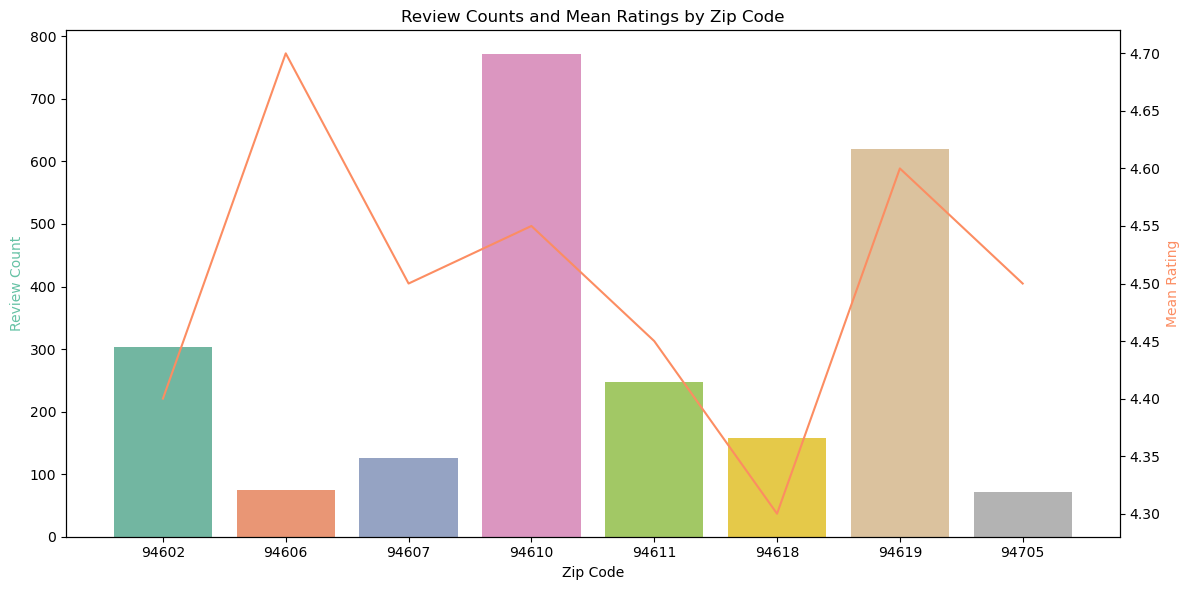

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("Set2", 15)

grouped_data = clean1.groupby('location.zip_code').agg({'rating': 'mean', 'review_count': 'sum'}).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(data=grouped_data, x='location.zip_code', y='review_count', ax=ax1, palette=colors)
ax1.set_ylabel('Review Count', color=colors[0]) 

ax2 = ax1.twinx()

sns.lineplot(data=grouped_data, x='location.zip_code', y='rating', ax=ax2, color=colors[1])  # Set color for line plot
ax2.set_ylabel('Mean Rating', color=colors[1])

ax1.set_xlabel('Zip Code')
ax1.set_title('Review Counts and Mean Ratings by Zip Code')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


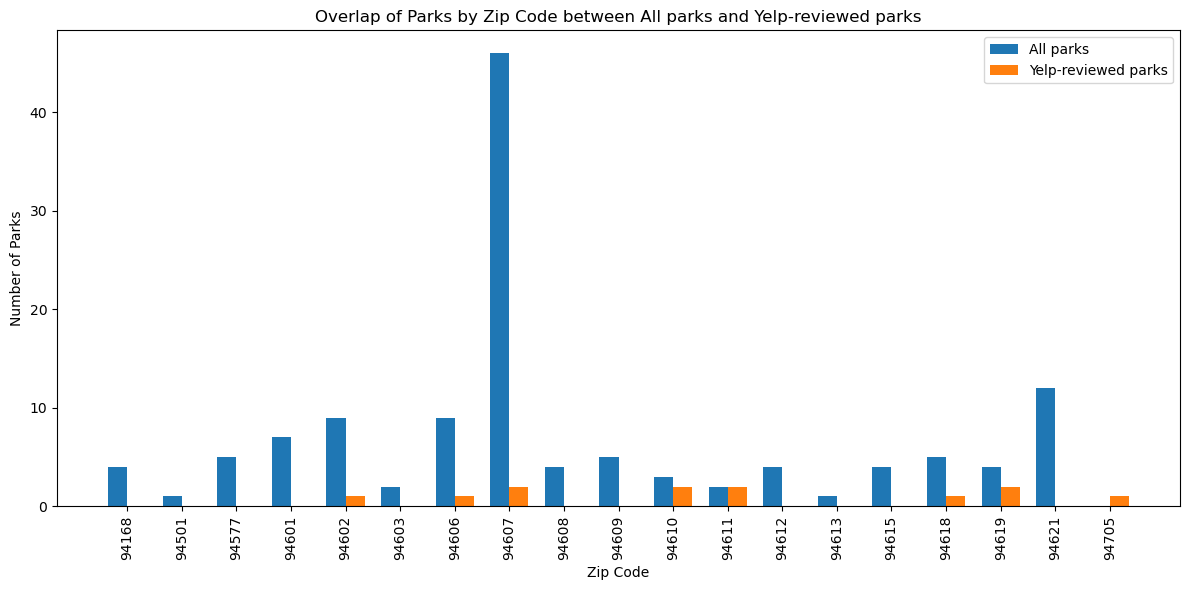

In [78]:
import matplotlib.pyplot as plt
import numpy as np

parks_by_zip_new_parks_oak = oak_parks_only.groupby('zip')['parks_and_recreation_facilities'].count()
parks_by_zip_clean1 = clean1.groupby('location.zip_code')['name'].count()

unique_zip_codes = sorted(set(parks_by_zip_new_parks_oak.index) | set(parks_by_zip_clean1.index))

counts_new_parks_oak = [parks_by_zip_new_parks_oak.get(zip_code, 0) for zip_code in unique_zip_codes]
counts_clean1 = [parks_by_zip_clean1.get(zip_code, 0) for zip_code in unique_zip_codes]

x = np.arange(len(unique_zip_codes))

width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, counts_new_parks_oak, width, label='All parks')
bars2 = ax.bar(x + width/2, counts_clean1, width, label='Yelp-reviewed parks')

ax.set_xlabel('Zip Code')
ax.set_ylabel('Number of Parks')
ax.set_title('Overlap of Parks by Zip Code between All parks and Yelp-reviewed parks')
ax.set_xticks(x)
ax.set_xticklabels(unique_zip_codes, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()


In [16]:
#no filler words

reviews = clean1['reviews']

all_reviews = ' '.join(reviews)

words = all_reviews.lower().split()

# list of filler to remove
filler_words = ['the', 'in', 'and', 'to', 'of', 'a', 'is', 'it', 'for', 'that', 
                'with', 'on', 'at', 'as','this','i','there','we','my','when','are',
                "it's",'an','here','was','even','not','about','but','have']

# filter out filler 
filtered_words = [word for word in words if word not in filler_words]


word_freq_df = pd.DataFrame(filtered_words, columns=['word'])
word_freq_df['count'] = 1
word_freq = word_freq_df.groupby('word').count().reset_index()

sorted_word_freq = word_freq.sort_values(by='count', ascending=False)

most_common_words = sorted_word_freq.head(10)
print(most_common_words)

          word  count
296       park      8
174       hike      8
45         bay      6
299    parking      6
236       love      5
212       lake      5
283        one      5
420      trail      4
113       easy      4
51   beautiful      4


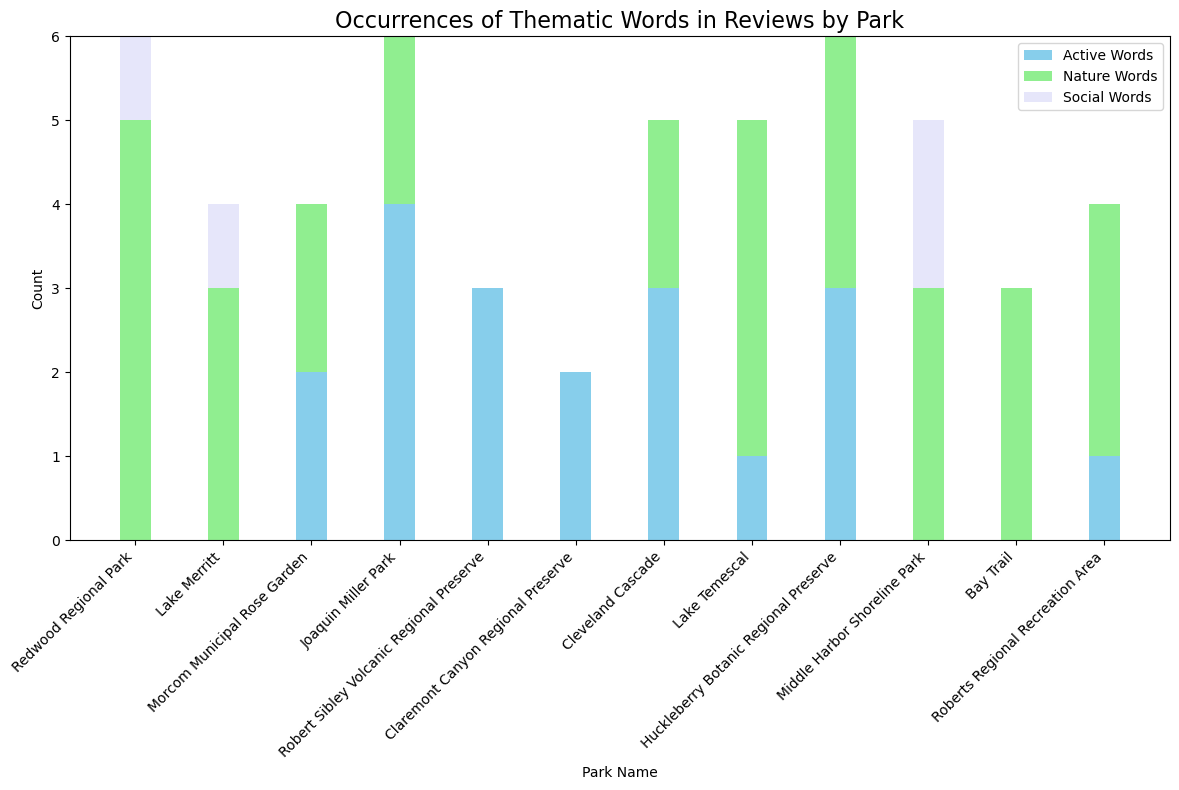

In [28]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

parks = clean1['name'].unique()

active_words = ['hike', 'walk', 'run','hiking',
               'walking','running','exercise','workout']

#bike, playing, biking, hikes,exercising,working out,work out, fitness not mentioned after running so removed

nature_words = ['nature', 'green', 'tree', 'park', 'forest', 'trail', 'garden', 'scenic', 'wildlife', 
                'lake', 'pond', 'river', 'stream', 'ocean', 'mountain', 'hill', 'landscape', 'lush', 
                'vegetation','flower','flowers','bloom','blooms','wildflowers','wildflower','animals',
                'animal','insect','insects','bird','birds','bay','wetland','view','trees','shade']

social_words = ['picnic','game','games','picnicking','music','concert',"farmer's market",
                  'market',"farmers market",'hang','hang out','hangout','chill','vibe',
               'party','birthday','celebrate','celebration','friends','friend',
               'play','musical']

#no one talks about weather so that was removed

# Initialize dictionaries to store word counts by park
word_count_active = {}
word_count_nature = {}
word_count_social={}

# Loop through each park
for park in parks:
    # Filter the dataframe for the current park
    park_reviews = clean1[clean1['name'] == park]['reviews']
    
    all_reviews = ' '.join(park_reviews)
    
    words = all_reviews.lower().split()
    
    word_count_active[park] = sum(words.count(word) for word in active_words)
    word_count_nature[park] = sum(words.count(word) for word in nature_words)
    word_count_social[park]=sum(words.count(word) for word in social_words)

fig, ax = plt.subplots(figsize=(12, 8))

# Stacked bar plot
bar_width = 0.35
parks_list = list(parks)
active_values = [word_count_active[park] for park in parks_list]
nature_values = [word_count_nature[park] for park in parks_list]
social_values = [word_count_social[park] for park in parks_list]

ax.bar(parks_list, active_values, bar_width, color='skyblue', label='Active Words')
ax.bar(parks_list, nature_values, bar_width, color='lightgreen', bottom=active_values, label='Nature Words')
ax.bar(parks_list, social_values, bar_width, color='lavender', bottom=[sum(x) for x in zip(active_values, nature_values)], label='Social Words')

ax.set_title("Occurrences of Thematic Words in Reviews by Park", fontsize=16)
ax.set_xlabel("Park Name")
ax.set_ylabel("Count")

plt.xticks(rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

# Part 6: Short Analysis

The charts and dataframes above showthe distribution of parks in Oakland by zip code from the city-provided data and the Yelp-reviewed park data.

The 'Review Counts and Mean Ratings by Zip Code' chart shows the quantity of reviews of parks by zip code, with 94610 being the most reviewed zip code and 94606 being the least reviewed zip code. That chart also shows the average rating, with the highest rated zip code being the least reviewed, 94606, and the lowest rated zip code being 94618.

The 'Overlap' graph quickly demonstrates how under-reviewed Oakland parks are with the number of parks per zip code and the Yelp-reviewed parks side-by-side.

The 'Occurrences of Thematic Words in Reviews by Park' chart explores some of the content of reviews among Yelp-reviewed parks broken out by active, social, and nature themes. Some parks are exclusively talked about for the active opportunities there like Sibley and Claremont Canyon or nature themes like the Bay Trail, while others show a mix of active-nature or nature-social. There is no park that contains a mix of all three themes, nor one that has active-social reviews.

# Part 7: Research question and next steps

Environmental "hard" data metrics of parks like vegetation index and tree canopy cover are often used in characterizing parks. Park access is also a prominent data point in recent years with statewide initiatives like CA Parks for All. Interested in filling in some qualitative gaps, I am exploring other characteristics that people like and dislike about parks and can be incorporated into park quality metrics, like the City of Oakland has done. However, it only shares data at the council district level.

I am exploring use and perception of parks by evaluating activities, amenities, emotions, and other themes that emerge from reviews. I then will comprise these and calculate them into averages by theme and overall to investigate distributions, as well as potential differences upon scaling back up to the council district level and see how well it aligns with the city's data. I anticipate doing correlations to evaluate what qualities are correlated with higher scores will be part of my analysis.

I also have found data that the City of Oakland has on "priority census tracts" and may explore the spatial disparities (if any) between these tracts and the distribution of park ratings. I currently am using zip codes as my spatial variable but I may granularize that down to neighborhoods or tracts.